### Classifying movie reviews - Part 1

1. Load the IMDB Dataset
• Hint – Import the dataset from keras datasets(imdb)
• only keep the top 10,000 most frequently occurring words in the training data. (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [1]:
# Import Required Library
import numpy as np

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# fix random seed for reproducibility
seed = 5555
np.random.seed(seed)

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

###  Keeping the top 10,000 most frequently occurring words in the training data will discarded the Rare words 

In [3]:
train_data.shape

(25000,)

In [4]:
test_labels.shape

(25000,)

### The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

### 2. Prepare the Data
1. Encode the integer sequences into a binary matrix
2. Vectorise your labels

In [5]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [7]:
#vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3. Building your network

In [8]:
#output = relu(dot(W, input) + b)
# The model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
#Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [10]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [11]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

### 4. Validating your approach

In [12]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#Training your modeL
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 576us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 328us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 5s 326us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 5s 310us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 5s 306us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3163 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

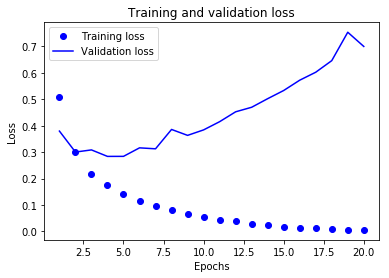

In [14]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

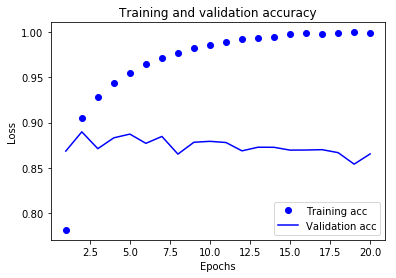

In [15]:
#Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 212us/step - loss: 0.4741 - acc: 0.8220
Epoch 2/4
25000/25000 [==============================] - 5s 196us/step - loss: 0.2674 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 5s 188us/step - loss: 0.2033 - acc: 0.9287 0s - loss: 0.2032 - acc
Epoch 4/4
25000/25000 [==============================] - 13s 512us/step


In [17]:
print(results)

[0.31143793699264527, 0.87595999999999996]


#### 5.Using a trained network to generate predictions on new data

In [18]:
model.predict(x_test)

array([[ 0.16349587],
       [ 0.99984384],
       [ 0.39056975],
       ..., 
       [ 0.08095709],
       [ 0.04862019],
       [ 0.45712492]], dtype=float32)

### 6. Further experiments
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement: You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on. Try using the mse loss function instead of binary_crossentropy. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.